In [2]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

## Part 1: Prepare The Data

In [3]:
# Loading data
file_path = Path("myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Remove "MYOPIC" column 
myopia_df = myopia_df.drop(columns=["MYOPIC"])
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(myopia_df)

## Part 2: Apply Dimensionality Reduction

In [17]:
# Get the shape of features
myopia_scaled.shape

(618, 14)

In [12]:
# Initialize PCA model
from sklearn.decomposition import PCA

# Preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

# Get the principal components for the myopia dataframe
myopia_pca = pca.fit_transform(myopia_scaled)

# Transform PCA data to a DataFrame
myopia_pca_df = pd.DataFrame(data=myopia_pca)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [14]:
# Get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [16]:
# Get the shape of features after reduction
myopia_pca_df.shape

(618, 10)

In [18]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results. 

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=200)

tsne_features = tsne.fit_transform(myopia_pca_df)

In [19]:
# Get the shape of features after further reduction
tsne_features.shape

(618, 2)

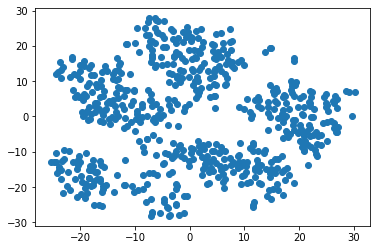

In [22]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## Part 3: Cluster Analysis with K-means

In [23]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

In [24]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


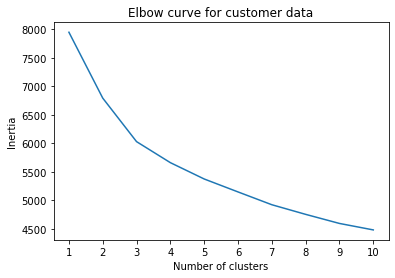

In [25]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

## Part 4: Recommendation

Both the scatterplot and elbow curve suggest similar trends. For the given data, we can conclude that the optimal number of clusters is 3.